<a href="https://colab.research.google.com/github/Ayushijaiswal24/AutoApply-AI/blob/master/Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("paramaggarwal/fashion-product-images-dataset")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fashion-product-images-dataset' dataset.
Path to dataset files: /kaggle/input/fashion-product-images-dataset


In [ ]:
import os

data_path = "/kaggle/input/fashion-product-images-dataset/fashion-dataset"
print(os.listdir(data_path))

['images.csv', 'images', 'styles.csv', 'styles', 'fashion-dataset']


In [ ]:
# Explore styles.csv
import pandas as pd
styles = pd.read_csv(data_path + "/styles.csv", on_bad_lines="skip")
print("Styles CSV shape:", styles.shape)
print("Columns:", styles.columns)
print(styles.head())


Styles CSV shape: (44424, 10)
Columns: Index(['id', 'gender', 'masterCategory', 'subCategory', 'articleType',
       'baseColour', 'season', 'year', 'usage', 'productDisplayName'],
      dtype='object')
      id gender masterCategory subCategory  articleType baseColour  season  \
0  15970    Men        Apparel     Topwear       Shirts  Navy Blue    Fall   
1  39386    Men        Apparel  Bottomwear        Jeans       Blue  Summer   
2  59263  Women    Accessories     Watches      Watches     Silver  Winter   
3  21379    Men        Apparel  Bottomwear  Track Pants      Black    Fall   
4  53759    Men        Apparel     Topwear      Tshirts       Grey  Summer   

     year   usage                             productDisplayName  
0  2011.0  Casual               Turtle Check Men Navy Blue Shirt  
1  2012.0  Casual             Peter England Men Party Blue Jeans  
2  2016.0  Casual                       Titan Women Silver Watch  
3  2011.0  Casual  Manchester United Men Solid Black Track P

In [ ]:
# Explore images.csv
images = pd.read_csv(data_path + "/images.csv", on_bad_lines="skip")
print("\nImages CSV shape:", images.shape)
print("Columns:", images.columns)
print(images.head())


Images CSV shape: (44446, 2)
Columns: Index(['filename', 'link'], dtype='object')
    filename                                               link
0  15970.jpg  http://assets.myntassets.com/v1/images/style/p...
1  39386.jpg  http://assets.myntassets.com/v1/images/style/p...
2  59263.jpg  http://assets.myntassets.com/v1/images/style/p...
3  21379.jpg  http://assets.myntassets.com/v1/images/style/p...
4  53759.jpg  http://assets.myntassets.com/v1/images/style/p...


In [ ]:
# Check missing values
print(styles.isnull().sum())

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64


In [ ]:
# Fill missing values with 'Unknown'
styles = styles.fillna("Unknown")

print("After filling missing values:")
print(styles.isnull().sum())


After filling missing values:
id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64


In [ ]:
# Unique values in each important column
print("\nUnique genders:", styles['gender'].unique())
print("\nUnique master categories:", styles['masterCategory'].unique())
print("\nUnique sub categories:", styles['subCategory'].unique()[:20])  # first 20
print("\nUnique usages:", styles['usage'].unique())
print("\nUnique seasons:", styles['season'].unique())


Unique genders: ['Men' 'Women' 'Boys' 'Girls' 'Unisex']

Unique master categories: ['Apparel' 'Accessories' 'Footwear' 'Personal Care' 'Free Items'
 'Sporting Goods' 'Home']

Unique sub categories: ['Topwear' 'Bottomwear' 'Watches' 'Socks' 'Shoes' 'Belts' 'Flip Flops'
 'Bags' 'Innerwear' 'Sandal' 'Shoe Accessories' 'Fragrance' 'Jewellery'
 'Lips' 'Saree' 'Eyewear' 'Nails' 'Scarves' 'Dress'
 'Loungewear and Nightwear']

Unique usages: ['Casual' 'Ethnic' 'Formal' 'Sports' 'Unknown' 'Smart Casual' 'Travel'
 'Party' 'Home']

Unique seasons: ['Fall' 'Summer' 'Winter' 'Spring' 'Unknown']


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import os
import pandas as pd



In [ ]:
# Path to dataset
data_path = "/kaggle/input/fashion-product-images-dataset/fashion-dataset"

# Path to images folder
image_folder = os.path.join(data_path, "images")

# Load styles.csv
styles = pd.read_csv(os.path.join(data_path, "styles.csv"), on_bad_lines="skip")

# Fill missing values with 'Unknown' for safety
styles = styles.fillna("Unknown")


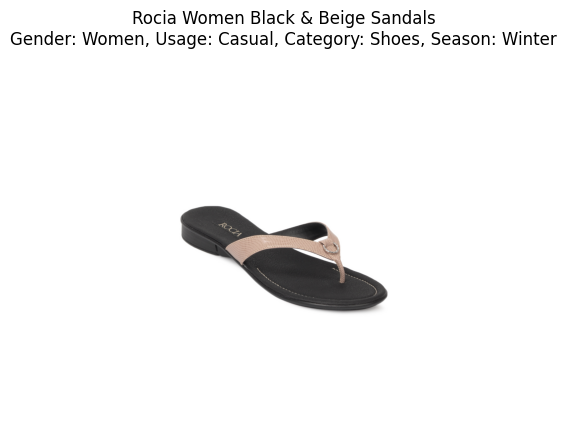

In [ ]:
# Pick a random product
sample = styles.sample(n=1).iloc[0]

# Construct image path
img_path = os.path.join(image_folder, f"{sample['id']}.jpg")

# Display image with metadata
if os.path.exists(img_path):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(
        f"{sample['productDisplayName']}\n"
        f"Gender: {sample['gender']}, Usage: {sample['usage']}, "
        f"Category: {sample['subCategory']}, Season: {sample['season']}"
    )
    plt.show()
else:
    print("Image not found for id:", sample['id'])


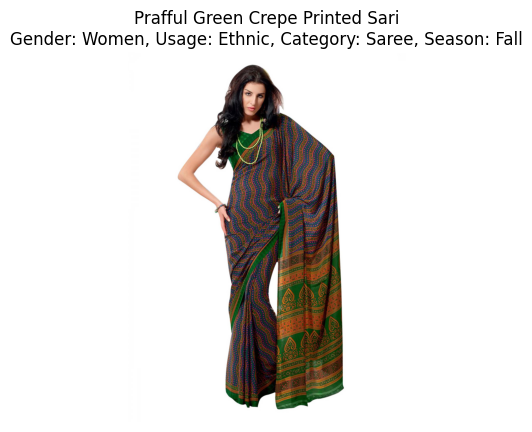

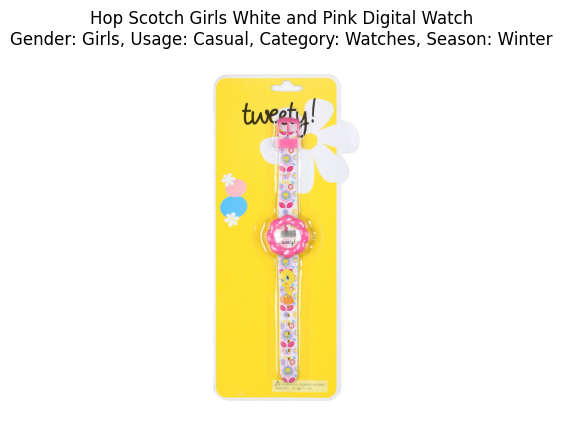

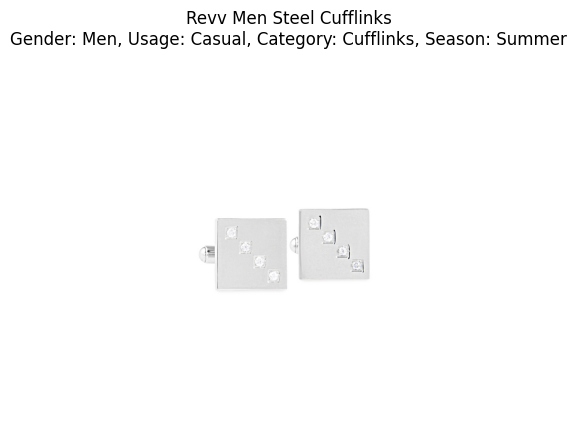

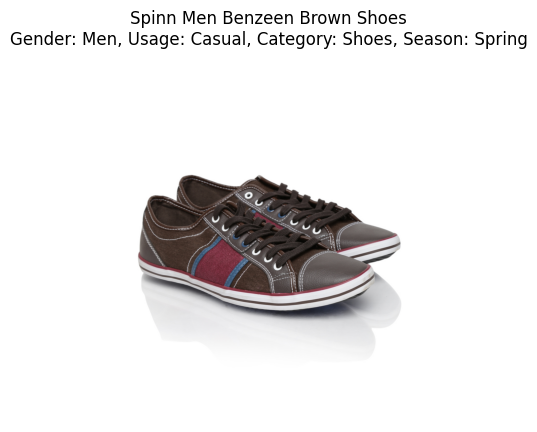

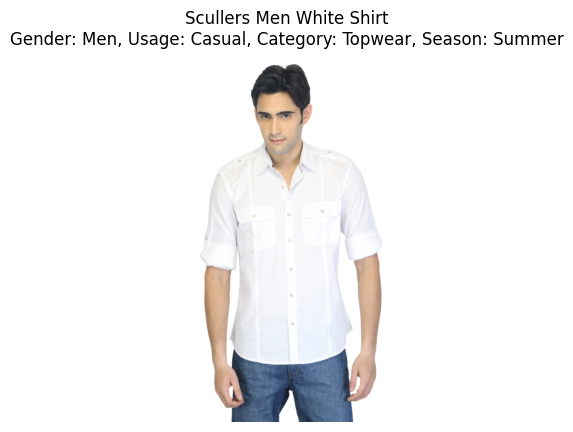

In [ ]:
# Show 5 random products
for _ in range(5):
    sample = styles.sample(n=1).iloc[0]
    img_path = os.path.join(image_folder, f"{sample['id']}.jpg")
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        plt.imshow(img)
        plt.axis('off')
        plt.title(
            f"{sample['productDisplayName']}\n"
            f"Gender: {sample['gender']}, Usage: {sample['usage']}, "
            f"Category: {sample['subCategory']}, Season: {sample['season']}"
        )
        plt.show()
    else:
        print("Image not found for id:", sample['id'])


In [ ]:
# Occasion mapping
occasion_mapping = {
    "Wedding": {
        "usage": ["Ethnic"],
        "subCategory": ["Saree", "Dress", "Jewellery", "Sherwani"],
        "articleType": []  # Optional: add more specific articleTypes if needed
    },
    "Office": {
        "usage": ["Formal"],
        "subCategory": [],
        "articleType": ["Shirts", "Trousers", "Blazers", "Shoes"]
    },
    "College": {
        "usage": ["Casual", "Smart Casual"],
        "subCategory": [],
        "articleType": ["Tshirts", "Jeans", "Sneakers"]
    },
    "Sports": {
        "usage": ["Sports"],
        "subCategory": [],
        "articleType": ["Track Pants", "Shoes", "Jerseys"]
    },
    "Party": {
        "usage": ["Party", "Smart Casual"],
        "subCategory": [],
        "articleType": ["Dresses", "Tops", "Heels", "Blazers"]
    },
    "Vacation": {
        "usage": ["Travel", "Casual"],
        "subCategory": [],
        "articleType": ["Shorts", "Sunglasses", "Tshirts", "Sandals"]
    }
}

# Check the dictionary
import pprint
pprint.pprint(occasion_mapping)


{'College': {'articleType': ['Tshirts', 'Jeans', 'Sneakers'],
             'subCategory': [],
             'usage': ['Casual', 'Smart Casual']},
 'Office': {'articleType': ['Shirts', 'Trousers', 'Blazers', 'Shoes'],
            'subCategory': [],
            'usage': ['Formal']},
 'Party': {'articleType': ['Dresses', 'Tops', 'Heels', 'Blazers'],
           'subCategory': [],
           'usage': ['Party', 'Smart Casual']},
 'Sports': {'articleType': ['Track Pants', 'Shoes', 'Jerseys'],
            'subCategory': [],
            'usage': ['Sports']},
 'Vacation': {'articleType': ['Shorts', 'Sunglasses', 'Tshirts', 'Sandals'],
              'subCategory': [],
              'usage': ['Travel', 'Casual']},
 'Wedding': {'articleType': [],
             'subCategory': ['Saree', 'Dress', 'Jewellery', 'Sherwani'],
             'usage': ['Ethnic']}}


In [ ]:
# Example: Get all Wedding items
wedding_items = styles[
    (styles['usage'].isin(occasion_mapping['Wedding']['usage'])) &
    (styles['subCategory'].isin(occasion_mapping['Wedding']['subCategory']))
]

print("Wedding items found:", wedding_items.shape[0])
wedding_items.head()


Wedding items found: 574


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
60,59607,Women,Apparel,Saree,Sarees,Grey,Fall,2012.0,Ethnic,FNF Pink & Grey Wedding Collection Sari
161,59638,Women,Apparel,Saree,Sarees,Green,Fall,2012.0,Ethnic,FNF Green Wedding Collection Sari
175,35322,Women,Accessories,Jewellery,Earrings,Silver,Winter,2016.0,Ethnic,Fabindia Women Anusuya Silver Earrings
304,56684,Women,Apparel,Saree,Sarees,Beige,Fall,2012.0,Ethnic,Fabindia Beige & Maroon Mull Printed Saree
411,59600,Women,Apparel,Saree,Sarees,Rust,Fall,2012.0,Ethnic,FNF Rust Wedding Collection Sari


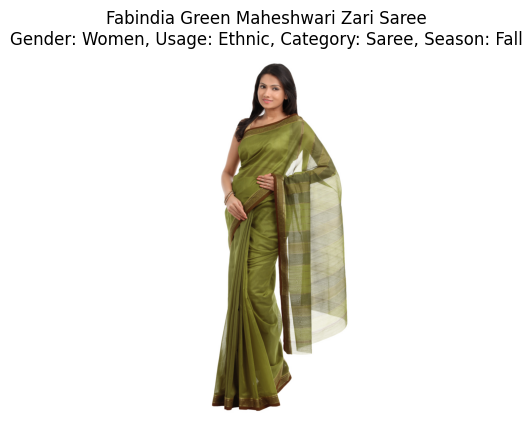

In [ ]:
# Show a random Wedding item with image
sample = wedding_items.sample(n=1).iloc[0]
img_path = os.path.join(image_folder, f"{sample['id']}.jpg")

if os.path.exists(img_path):
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg

    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(
        f"{sample['productDisplayName']}\nGender: {sample['gender']}, Usage: {sample['usage']}, "
        f"Category: {sample['subCategory']}, Season: {sample['season']}"
    )
    plt.show()
else:
    print("Image not found for id:", sample['id'])


In [ ]:
office_items = styles[
    (styles['usage'].isin(occasion_mapping['Office']['usage'])) &
    (styles['articleType'].isin(occasion_mapping['Office']['articleType']))
]

print("Office items found:", office_items.shape[0])
office_items.head()



Office items found: 1109


,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
15,12369,Men,Apparel,Topwear,Shirts,Purple,Fall,2011.0,Formal,Reid & Taylor Men Check Purple Shirts
30,37812,Men,Apparel,Topwear,Shirts,Navy Blue,Summer,2012.0,Formal,John Players Men Navy Blue Shirt
48,9452,Men,Apparel,Topwear,Shirts,Red,Fall,2011.0,Formal,John Miller Men Stripes White Red Shirts
117,27846,Women,Apparel,Topwear,Blazers,Charcoal,Summer,2012.0,Formal,Scullers For Her Charcoal Blazer
166,10257,Men,Apparel,Bottomwear,Trousers,Black,Fall,2011.0,Formal,John Miller Men Solid Type Black Trousers


In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

def show_random_products(occasion, n=5):
    mapping = occasion_mapping[occasion]

    # Filter dataset
    filtered = styles[
        (styles['usage'].isin(mapping['usage'])) &
        ((styles['subCategory'].isin(mapping['subCategory'])) |
         (styles['articleType'].isin(mapping['articleType'])))
    ]

    print(f"{occasion} items found:", filtered.shape[0])

    for _ in range(n):
        if filtered.shape[0] == 0:
            print("No items found for this occasion.")
            return
        sample = filtered.sample(n=1).iloc[0]
        img_path = os.path.join(image_folder, f"{sample['id']}.jpg")
        if os.path.exists(img_path):
            img = mpimg.imread(img_path)
            plt.imshow(img)
            plt.axis('off')
            plt.title(
                f"{sample['productDisplayName']}\n"
                f"Gender: {sample['gender']}, Usage: {sample['usage']}, "
                f"Category: {sample['subCategory']}, Season: {sample['season']}"
            )
            plt.show()
        else:
            print("Image not found for id:", sample['id'])


Wedding items found: 574


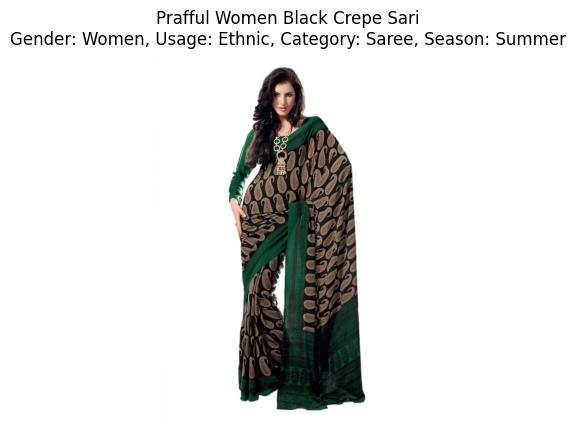

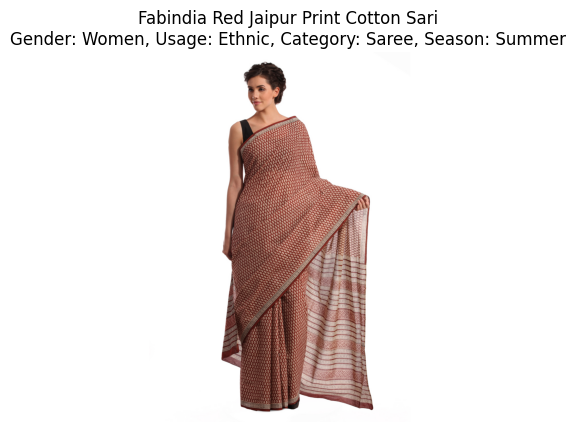

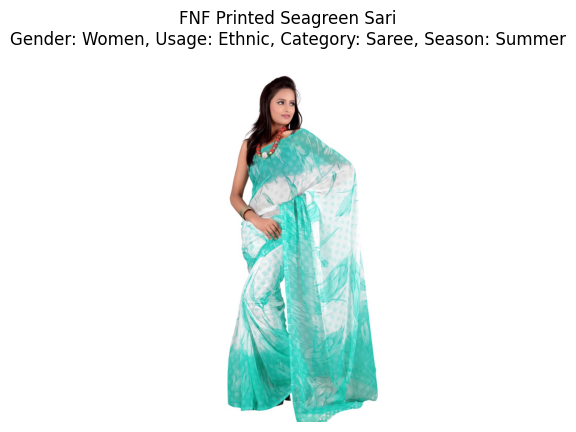

In [ ]:
# Display 3 random Wedding products
show_random_products("Wedding", n=3)


College items found: 6719


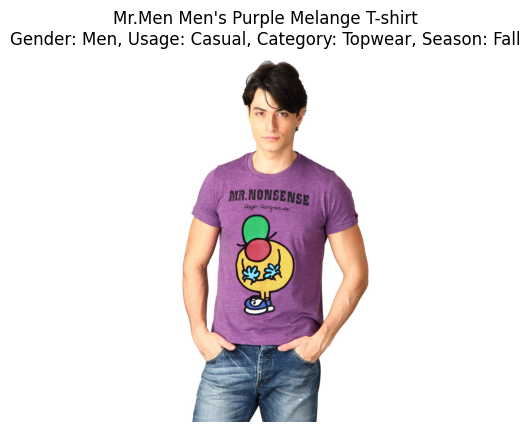

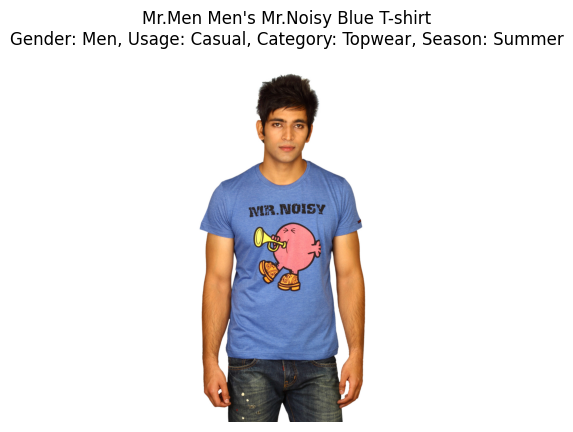

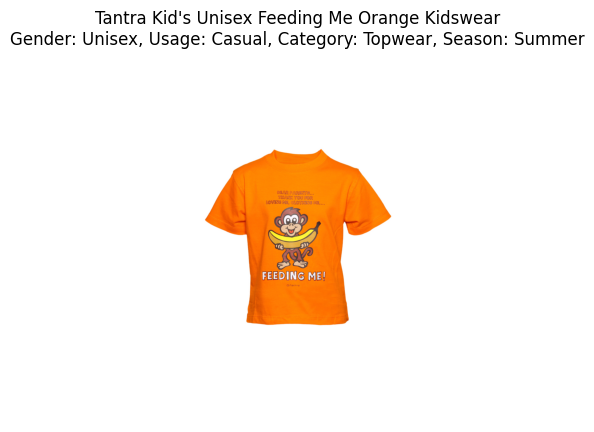

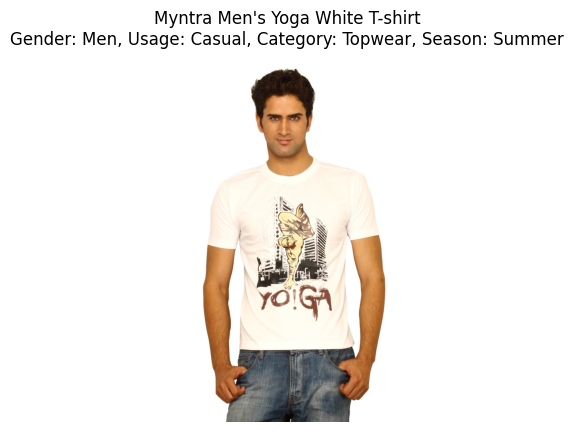

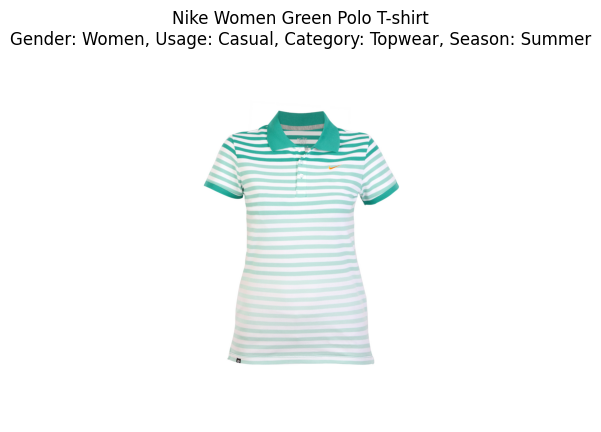

In [ ]:

# Display 5 random College products
show_random_products("College", n=5)

Office items found: 1109


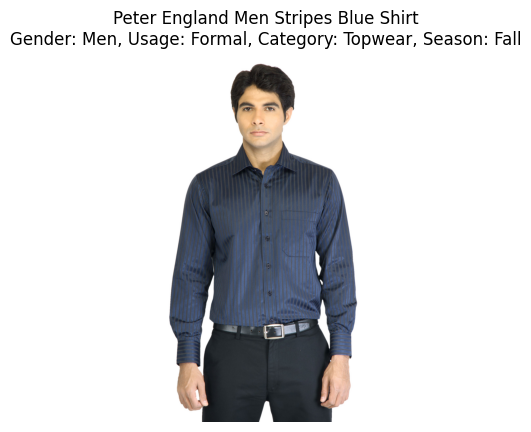

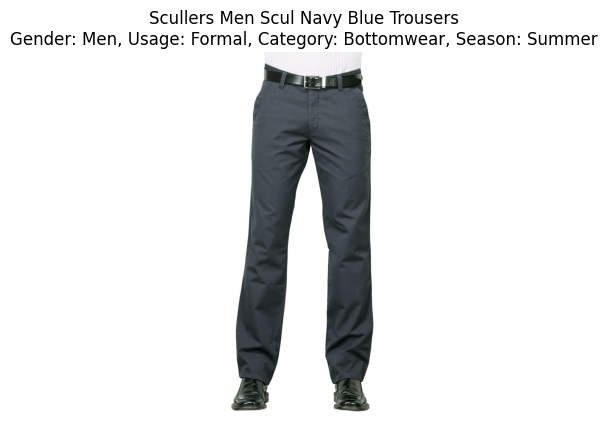

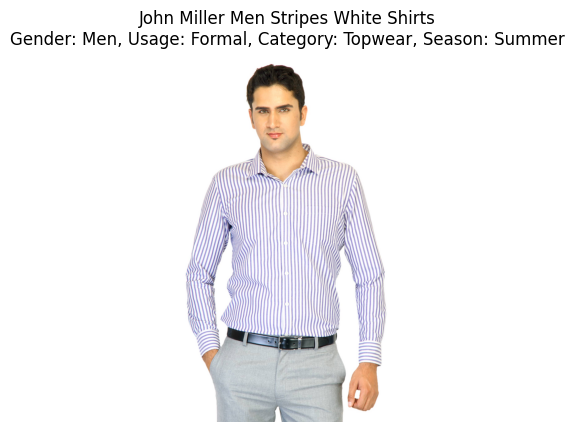

In [ ]:
# Display 3 random Office products
show_random_products("Office", n=3)

In [ ]:
# Example: save Wedding items
wedding_items = styles[
    (styles['usage'].isin(occasion_mapping['Wedding']['usage'])) &
    (styles['subCategory'].isin(occasion_mapping['Wedding']['subCategory']))
]
wedding_items.to_csv("wedding_items.csv", index=False)


In [ ]:
import os
print(os.getcwd())  # shows current directory
print(os.listdir()) # lists all files in current directory


/content
['.config', 'wedding_items.csv', 'sample_data']


In [ ]:
from google.colab import files

files.download("wedding_items.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
!pip install streamlit
import streamlit as st

occasion = st.selectbox("Select Occasion", list(occasion_mapping.keys()))
n = st.slider("Number of products to show", 1, 10, 3)

if st.button("Show Products"):
    show_random_products(occasion, n)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.0/10.0 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.1 MB/s eta 0:00:00


2025-09-07 17:42:08.463 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-07 17:42:08.464 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-07 17:42:08.466 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-07 17:42:08.467 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-09-07 17:42:08.468 WARNING streamlit.runtime.state.session_state_proxy: Session state does not function when running a script without `streamlit run`
2025-09-07 17:42:08.468 WARNING streamlit.runtime.scriptrunner_utils.script_run_c

In [ ]:
!pip install pyngrok


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

# Load dataset
data_path = "/kaggle/input/fashion-product-images-dataset/fashion-dataset"
styles = pd.read_csv(os.path.join(data_path, "styles.csv"), on_bad_lines="skip").fillna("Unknown")
image_folder = os.path.join(data_path, "images")

# Occasion mapping
occasion_mapping = {
    "Wedding": {"usage": ["Ethnic"], "subCategory": ["Saree", "Dress", "Jewellery", "Sherwani"], "articleType": []},
    "Office": {"usage": ["Formal"], "subCategory": [], "articleType": ["Shirts", "Trousers", "Blazers", "Shoes"]},
    "College": {"usage": ["Casual", "Smart Casual"], "subCategory": [], "articleType": ["Tshirts", "Jeans", "Sneakers"]},
    "Sports": {"usage": ["Sports"], "subCategory": [], "articleType": ["Track Pants", "Shoes", "Jerseys"]},
    "Party": {"usage": ["Party", "Smart Casual"], "subCategory": [], "articleType": ["Dresses", "Tops", "Heels", "Blazers"]},
    "Vacation": {"usage": ["Travel", "Casual"], "subCategory": [], "articleType": ["Shorts", "Sunglasses", "Tshirts", "Sandals"]}
}

# Sidebar controls
occasion = st.sidebar.selectbox("Select Occasion", list(occasion_mapping.keys()))
num_products = st.sidebar.slider("Number of products to display", 1, 10, 3)

# Filter function
mapping = occasion_mapping[occasion]
filtered = styles[
    (styles['usage'].isin(mapping['usage'])) &
    ((styles['subCategory'].isin(mapping['subCategory'])) |
     (styles['articleType'].isin(mapping['articleType'])))
]

st.write(f"Found {filtered.shape[0]} products for {occasion}")

# Display random products
for _ in range(num_products):
    if filtered.shape[0] == 0:
        st.write("No items found for this occasion.")
        break
    sample = filtered.sample(n=1).iloc[0]
    img_path = os.path.join(image_folder, f"{sample['id']}.jpg")
    if os.path.exists(img_path):
        img = mpimg.imread(img_path)
        st.image(img, caption=f"{sample['productDisplayName']}\nGender: {sample['gender']}, Usage: {sample['usage']}, Category: {sample['subCategory']}, Season: {sample['season']}")
    else:
        st.write("Image not found for id:", sample['id'])


Writing app.py


In [ ]:
!rm -f /root/.config/ngrok/ngrok.yml


In [ ]:
!ngrok authtoken 2yHpQKzPZHQW6L9QvUsVHr48dlU_5ow1R5NxUU1WyNSpugzLm


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [ ]:
from pyngrok import ngrok

# Kill any existing tunnels
ngrok.kill()

# Start a tunnel to port 8501 (Streamlit default)
public_url = ngrok.connect(8501)
print("Your Streamlit app is live at:", public_url)

# Run Streamlit app in the background
!streamlit run app.py &>/dev/null &


Your Streamlit app is live at: NgrokTunnel: "https://50a19dc00ee3.ngrok-free.app" -> "http://localhost:8501"


In [ ]:
!ngrok kill


ngrok - tunnel local ports to public URLs and inspect traffic

USAGE:
  ngrok [command] [flags]

COMMANDS: 
  api             CLI to api.ngrok.com
  completion      generates shell completion code for bash or zsh
  config          update or migrate ngrok's configuration file
  credits         prints author and licensing information
  help            help about any command
  http            start an HTTP tunnel
  service         run and control ngrok as a background service
  start           start endpoints in the config file by name
  tcp             start a TCP tunnel
  tls             start a TLS endpoint
  update          update ngrok to the latest version
  version         print the version string

EXAMPLES: 
# forward http traffic from assigned public URL to local port 80
ngrok http 80
# port 8080 available at baz.ngrok.dev
ngrok http --url baz.ngrok.dev 8080
# tunnel arbitrary TCP traffic to port 22
ngrok tcp 22
# secure your app with oauth
ngrok http 80 --oauth=google --oauth-al

In [ ]:
!streamlit run app.py &>/dev/null &


In [ ]:
# Run Streamlit in the background so Colab doesn't hang
!nohup streamlit run app.py &


nohup: appending output to 'nohup.out'


In [ ]:
!ps aux | grep streamlit


root        1132  0.0  0.1  34876 24932 ?        R    17:44   0:00 /usr/bin/python3 /usr/local/bin/streamlit run app.py
root        1137  0.0  0.0   7376  3464 ?        S    17:44   0:00 /bin/bash -c ps aux | grep streamlit
root        1139  0.0  0.0   6484  2296 ?        S    17:44   0:00 grep streamlit


In [ ]:
from pyngrok import ngrok

# Kill any existing tunnels
ngrok.kill()


# Open a tunnel to Streamlit's default port 8501
public_url = ngrok.connect(8501)
print("Your Streamlit app is live at:", public_url)


Your Streamlit app is live at: NgrokTunnel: "https://80c6247cc5d4.ngrok-free.app" -> "http://localhost:8501"
